In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv("LegacyBiz1.csv")

# import Legacy Business Registry; cleaned up and manually classified
# in Excel prior to uploading here

In [68]:
df['Business ID'] = 1

In [69]:
df.head()

,Name,Address,City,State,Phone,Website,Date_OnRegistry,Type,Latitude,Longitude,Business ID
0,Academy of Ballet,2121 Market Street,San Francisco,California,415-552-1166,https://sfacademyofballet.com/,11/12/19,School,37.766983,-122.429272,1
1,Acción Latina,2958 24th Street,San Francisco,California,415-648-1045,http://accionlatina.org/en/,3/17/17,Community / Non-profit,37.752898,-122.411270,1
2,"Adobe Books and Arts Cooperative, Inc.",3130 24th Street,San Francisco,California,(415) 864-3936,https://www.adobebooks.com/,1/13/20,Bookstore,37.752666,-122.414778,1
3,AIDS Legal Referral Panel,"1663 Mission Street, Suite 500",San Francisco,California,415-701-1100,http://www.alrp.org/,1/22/18,Community / Non-profit,37.771147,-122.419191,1
4,Alioto’s Restaurant,#8 Fisherman’s Wharf,San Francisco,California,415-673-0183,https://aliotos.com/,1/14/19,Restaurant / Food Business,37.808948,-122.416046,1


In [70]:
df['Name'].unique()     

# find unique values in the list, as some entries appear multiple times
# due to having branches at different locations

array(['Academy of Ballet', 'Acción Latina',
       'Adobe Books and Arts Cooperative, Inc.',
       'AIDS Legal Referral Panel', 'Alioto’s Restaurant',
       'Analytical Psychology Club', 'Anchor Brewing Company',
       'Anchor Oyster Bar', 'Anco Iron & Construction Inc.',
       'Animal Company', 'Anresco Laboratories',
       'Armstrong Carpet & Linoleum Company', 'Arrow Stamp & Coin Co.',
       'ArtHaus Gallery', 'Ave Bar', 'Avedano’s Holly Park Market',
       'Babylon Burning Screen Printing', 'Balboa Cafe', 'Balboa Theatre',
       'Bay Area Video Coalition, Inc.', 'Bay View Boat Club',
       'Beck’s Motor Lodge', 'Beep’s Burgers', 'Benkyodo Company',
       'Bi-Rite Market', 'BIX Restaurant', 'Blue Bear School of Music',
       "Bo's Flower Stand", 'Books Inc.', 'Boudin Bakery', 'Brazen Head',
       'Britex Fabrics', 'Brownies Hardware', 'Butter Bar & Restaurant',
       'Cable Car Clothiers', 'Café du Nord', 'Café International',
       'Caffé Sapore', 'Caffe Trieste', 'C

In [71]:
df.Type.describe()

count                            267
unique                            19
top       Restaurant / Food Business
freq                              72
Name: Type, dtype: object

In [72]:
df.head()

,Name,Address,City,State,Phone,Website,Date_OnRegistry,Type,Latitude,Longitude,Business ID
0,Academy of Ballet,2121 Market Street,San Francisco,California,415-552-1166,https://sfacademyofballet.com/,11/12/19,School,37.766983,-122.429272,1
1,Acción Latina,2958 24th Street,San Francisco,California,415-648-1045,http://accionlatina.org/en/,3/17/17,Community / Non-profit,37.752898,-122.411270,1
2,"Adobe Books and Arts Cooperative, Inc.",3130 24th Street,San Francisco,California,(415) 864-3936,https://www.adobebooks.com/,1/13/20,Bookstore,37.752666,-122.414778,1
3,AIDS Legal Referral Panel,"1663 Mission Street, Suite 500",San Francisco,California,415-701-1100,http://www.alrp.org/,1/22/18,Community / Non-profit,37.771147,-122.419191,1
4,Alioto’s Restaurant,#8 Fisherman’s Wharf,San Francisco,California,415-673-0183,https://aliotos.com/,1/14/19,Restaurant / Food Business,37.808948,-122.416046,1


In [73]:
df.Name.describe()

count               267
unique              235
top       Cole Hardware
freq                  5
Name: Name, dtype: object

In [74]:
df['Type'].value_counts()

Restaurant / Food Business    72
Community / Non-profit        28
Arts Organization             20
Grocery                       18
Recreation                    18
Bar / Brewery                 18
Fashion / Fabric              14
Bookstore                     14
Construction / Materials      13
Hobby Shop                    13
School                        11
Live Performance              10
Medical                        7
Automotive                     5
Floral                         2
Lodging                        1
Research / Lab                 1
Pet Store                      1
Laundry                        1
Name: Type, dtype: int64

In [75]:
import matplotlib.pyplot as plt

In [76]:
import seaborn as sns
sns.set()  # activate the Seaborn aesthetic defaults

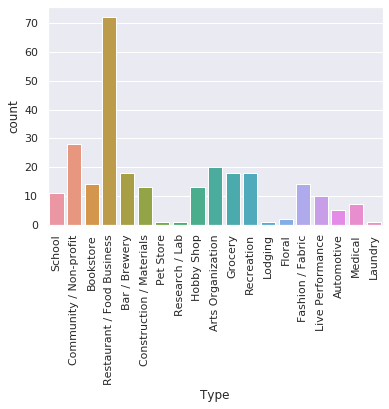

In [91]:
# visualizing legacy businesses by typology; food businesses far outnumber other types

sns.countplot(data=df, x='Type')
plt.xticks(rotation='vertical')

plt.show()

In [84]:
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, LineString, Polygon

In [86]:
 !pip install geopandas --upgrade;

Requirement already up-to-date: geopandas in /srv/app/venv/lib/python3.6/site-packages
Requirement already up-to-date: pyproj>=2.2.0 in /srv/app/venv/lib/python3.6/site-packages (from geopandas)
Requirement already up-to-date: pandas>=0.23.0 in /srv/app/venv/lib/python3.6/site-packages (from geopandas)
Requirement already up-to-date: shapely in /srv/app/venv/lib/python3.6/site-packages (from geopandas)
Requirement already up-to-date: fiona in /srv/app/venv/lib/python3.6/site-packages (from geopandas)
Requirement already up-to-date: numpy>=1.13.3 in /srv/app/venv/lib/python3.6/site-packages (from pandas>=0.23.0->geopandas)
Requirement already up-to-date: pytz>=2017.2 in /srv/app/venv/lib/python3.6/site-packages (from pandas>=0.23.0->geopandas)
Requirement already up-to-date: python-dateutil>=2.6.1 in /srv/app/venv/lib/python3.6/site-packages (from pandas>=0.23.0->geopandas)
Requirement already up-to-date: six>=1.7 in /srv/app/venv/lib/python3.6/site-packages (from fiona->geopandas)
Requ

In [80]:
!pip freeze; # exploring what version of geopandas I was using prompted me to update 

absl-py==0.9.0
affine==2.3.0
aiohttp==3.6.2
alabaster==0.7.12
alembic==1.4.1
allensdk==0.16.0
appdirs==1.4.3
appmode==0.4.0
arviz==0.7.0
astor==0.8.1
astropy==4.0
astroquery==0.3.10
async-generator==1.10
async-timeout==3.0.1
attrs==19.3.0
Babel==2.8.0
backcall==0.1.0
basemap==1.1.0
beautifulsoup4==4.6.0
bitarray==0.8.3
bkcharts==0.2
bleach==3.1.1
bokeh==0.12.6
branca==0.4.0
brewer2mpl==1.4.1
cachetools==4.0.0
Cartopy==0.17.0
certifi==2019.11.28
certipy==0.1.3
cffi==1.14.0
chardet==3.0.4
chart-studio==1.0.0
click==7.1.1
click-plugins==1.1.1
cligj==0.5.0
cloudpickle==1.1.1
contextily==1.0rc2
corner==2.0.1
coverage==4.5.3
coveralls==1.11.1
cryptography==2.8
csaps==0.5.0
cycler==0.10.0
cymem==1.31.2
Cython==0.29.15
cytoolz==0.8.2
daft==0.0.4
dask==2.3.0
datascience==0.15.1
decorator==4.4.2
defusedxml==0.6.0
Deprecated==1.2.7
descartes==1.1.0
dill==0.2.9
docopt==0.6.2
docutils==0.16
dustmaps==1.0.4
emcee==2.2.1
entrypoints==0.3
et-xmlfile==1.0.1
exoplanet==0.2.4
ffmpeg-python==0.1.17
Fiona=

In [87]:
import geoplot

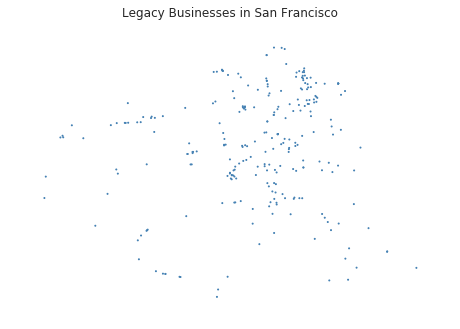

In [89]:
legacybusiness = gpd.read_file('LegacyBiz1.csv')

legacybusiness.Longitude = legacybusiness.Longitude.astype('float64')
legacybusiness.Latitude = legacybusiness.Latitude.astype('float64')

legacybusiness_geometry = [Point(xy) for xy in zip(legacybusiness.Longitude, legacybusiness.Latitude)]
gdf = gpd.GeoDataFrame(legacybusiness, geometry=legacybusiness_geometry)

# Plotting a map of where the businesses are located

ax = geoplot.pointplot(legacybusiness, s = 1)  # size of each point

ax.set_title("Legacy Businesses in San Francisco")

plt.show()


In [92]:
# Download a cartographic shapefile of the 50 states, which will include coastline

import requests
url = 'https://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_500k.zip'

with open('cb_2016_us_state_500k.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

In [93]:
outlines = gpd.read_file('zip://cb_2016_us_state_500k.zip')

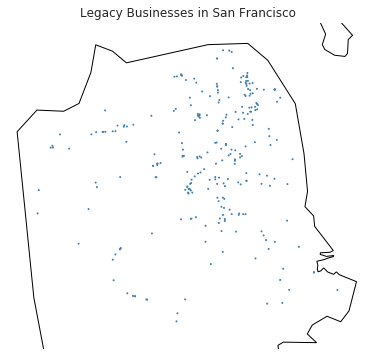

In [94]:
# Plot the coastline data we just loaded
ax = geoplot.polyplot(outlines, 
                      projection = geoplot.crs.AlbersEqualArea(),
                      extent = (-123, 36.9, -121.4, 38.7))  # lower left, upper right

# Overlay the legacy business points
geoplot.pointplot(legacybusiness, 
                  projection = geoplot.crs.AlbersEqualArea(),
                  ax = ax,  # add it to the axes created above
                  s = 1)

ax.set_title("Legacy Businesses in San Francisco")

plt.show()

In [112]:
# adding neighborhood boundaries from Open Data SF

nhood_map = gpd.read_file('RealtorNeighborhoods.geojson')

In [122]:
# trying to locate where the legacy businesses are by neighborhood & visualize them . . .

legacybusiness = nhood_map
legacybusiness = gpd.sjoin(nhood_map,legacybusiness)
nhood_legacybusiness_all = legacybusiness.nhood.value_counts()
nhood_map = nhood_map.merge(nhood_legacybusiness_all.to_frame('LegacyBusiness_All'), left_on = 'nhood',right_index = True)
abbreviations = ['Bayview', 'Bernal', 'Castro', 'ChTwn', 'Exclsr', 'FinDist', 'GlenPark', 'InRich', 'GGPark', 'Haight', 'Hayes', 'InSunset', 'JpTwn', 'McLrn', 'TndrLn', 'LakeSh', 'Lncln', 'USF', 'Marina', 'Rus_Hill', 'Mission', 'MisBay', 'Nob','SeaClf', 'Noe', 'N_Beach', 'Inglsde', 'SoMA', 'Sunset/Parkside', 'Out_Mis', 'Out_Rich', 'Pcfc_Hts', 'Prtl', 'Potrero Hill', 'Presidio', 'Prsd_Hts' , 'T_Isl', 'TwinPks', 'V_Val','WoTP', 'W_Add']    
nhood_map['abbr'] = abbreviations


KeyError: 'index_left'